<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/04%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84(0915).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('GOOG.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-03-28,558.46,559.66,564.88,557.14,41.12K,0.0027
1,2014-03-31,555.45,565.34,565.45,555.41,10.80K,-0.0054
2,2014-04-01,565.61,557.18,566.89,557.18,7.95K,0.0183
3,2014-04-02,565.45,598.35,603.17,560.65,147.10K,-0.0003
4,2014-04-03,568.18,568.29,585.67,562.59,5.10M,0.0048


In [3]:
# Date를 날짜와 시간 형식으로 바꿔서 다시 덮어씀
df.Date = pd.to_datetime(df.Date)

In [4]:
# fd의 인덱스(행 번호)를 Date로 바꿔라
df.set_index('Date', inplace=True)

In [5]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-03-28,558.46,559.66,564.88,557.14,41.12K,0.0027
2014-03-31,555.45,565.34,565.45,555.41,10.80K,-0.0054
2014-04-01,565.61,557.18,566.89,557.18,7.95K,0.0183
2014-04-02,565.45,598.35,603.17,560.65,147.10K,-0.0003
2014-04-03,568.18,568.29,585.67,562.59,5.10M,0.0048
...,...,...,...,...,...,...
2021-12-27,2961.28,2949.27,2968.53,2945.00,660.69K,0.0063
2021-12-28,2928.96,2967.49,2967.49,2918.71,912.40K,-0.0109
2021-12-29,2930.09,2928.59,2943.68,2910.09,839.10K,0.0004


<Axes: xlabel='Date'>

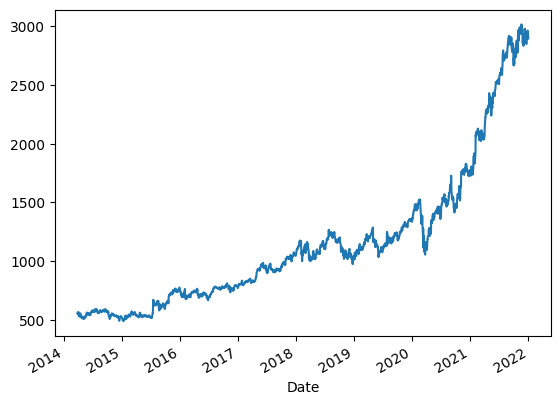

In [7]:
df.Price.plot()

### 변동성 보고싶을때

In [8]:
df.Price.diff()

Date
2014-03-28      NaN
2014-03-31    -3.01
2014-04-01    10.16
2014-04-02    -0.16
2014-04-03     2.73
              ...  
2021-12-27    18.43
2021-12-28   -32.32
2021-12-29     1.13
2021-12-30   -10.04
2021-12-31   -26.46
Name: Price, Length: 1957, dtype: float64

<Axes: xlabel='Date'>

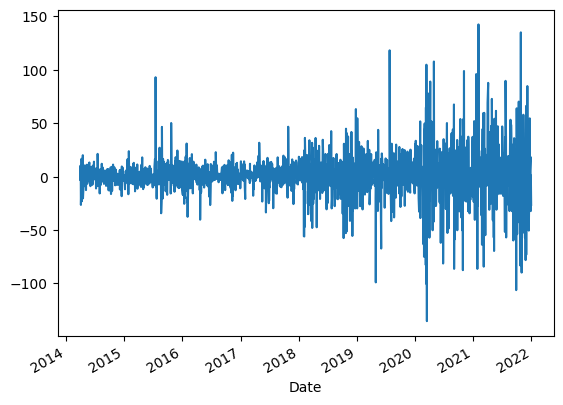

In [9]:
df.Price.diff().plot()

주식같은건 비율로 보는게 낫다

<Axes: xlabel='Date'>

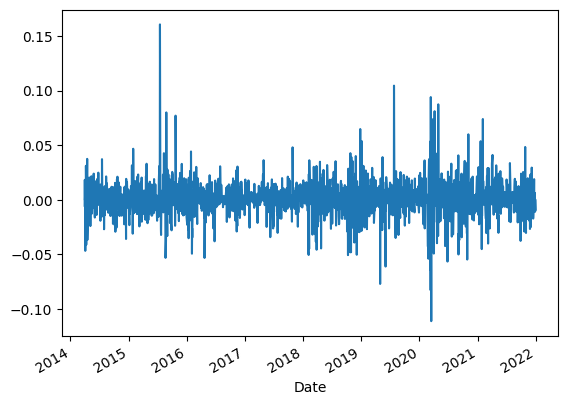

In [10]:
df.Price.pct_change().plot()

영업일 기준으로 월말로 보고싶을때

In [11]:
df.Price.asfreq('BM')

Date
2014-03-31     555.45
2014-04-30     525.22
2014-05-30     558.36
2014-06-30     573.70
2014-07-31     570.03
               ...   
2021-08-31    2909.24
2021-09-30    2665.31
2021-10-29    2965.41
2021-11-30    2849.04
2021-12-31    2893.59
Freq: BM, Name: Price, Length: 94, dtype: float64

### 영업일 기준으로 월초로 보고싶을때

In [ ]:
df.Price.asfreq('BMS')

연초별로 보고싶을때, 해당 날짜의 데이터가 비어있을 경우 이전(forward) 의 데이터로 채우기

In [13]:
df.Price.asfreq('AS', method='ffill')

Date
2015-01-01     524.96
2016-01-01     758.88
2017-01-01     771.82
2018-01-01    1046.40
2019-01-01    1035.61
2020-01-01    1337.02
2021-01-01    1751.88
Freq: AS-JAN, Name: Price, dtype: float64

### 2016-01-01 ~ 2016-01-07만 보고싶을때

In [14]:
df.Price['2016-01-01':'2016-01-07']

Date
2016-01-04    741.84
2016-01-05    742.58
2016-01-06    743.62
2016-01-07    726.39
Name: Price, dtype: float64

### 2016년을 그래프로 표현하기

<Axes: xlabel='Date'>

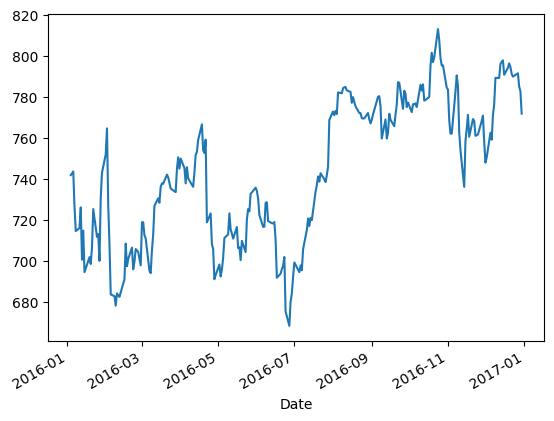

In [15]:
df.Price['2016'].plot()

### 2016년 1을 그래프로 표현하기

<Axes: xlabel='Date'>

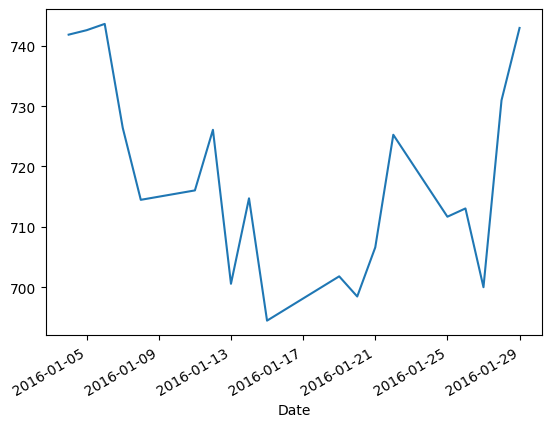

In [16]:
df.Price['2016-01'].plot()

# 리샘플(resample)

- 아래는 가격을 매년 초 (AS) 를 기준으로 잘라 , 연 평균 가격을 계산

<Axes: xlabel='Date'>

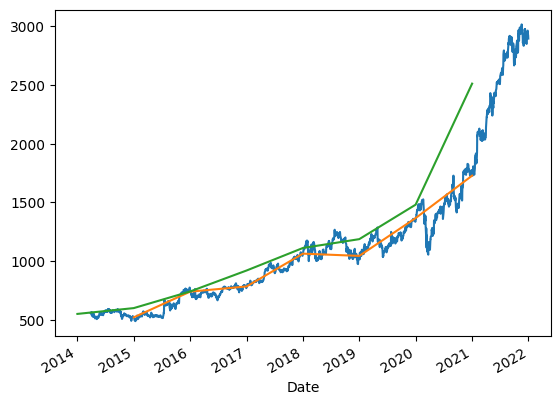

In [18]:
df.Price.plot()  # 매일 매일 가격
df.Price.asfreq('AS', method='bfill').plot() # 첫 날 가격
df.Price.resample('AS').mean().plot()        # 연평균 가격

## resample
리샘플
resample 은 일정 간격으로 구분 (2019 년 평균 , 2020 년 평균 등)
## rolling(이동평균)
rolling 은 모든 날짜를 기준으로 전후 365 일의 평균

<Axes: xlabel='Date'>

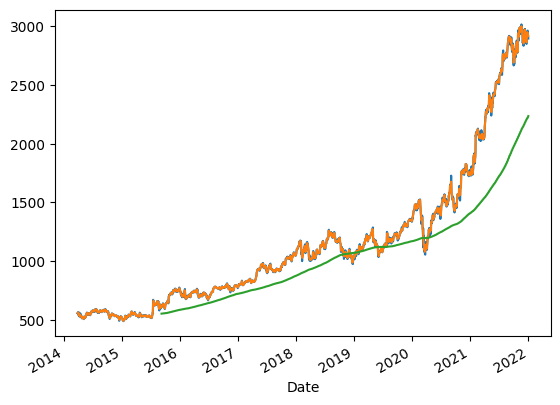

In [22]:
df.Price.plot()
# 추세를 보기 쉽게 할때는 center=True 를 이용해서
df.Price.rolling(3, center=True).mean().plot() # 가운데 날짜에 이동평균을 표시
df.Price.rolling(365).mean().plot() # 마지막 날짜에 이동평균을 표시


In [24]:
rolling.mean()

Date
2014-03-28            NaN
2014-03-31     559.840000
2014-04-01     562.170000
2014-04-02     566.413333
2014-04-03     558.426667
                 ...     
2021-12-27    2944.363333
2021-12-28    2940.110000
2021-12-29    2926.366667
2021-12-30    2914.576667
2021-12-31            NaN
Name: Price, Length: 1957, dtype: float64

In [23]:
df.Price.rolling(5, center=True).mean() # 앞에서 2일이 비어있고 뒤로 2일이 비어있음

Date
2014-03-28         NaN
2014-03-31         NaN
2014-04-01     562.630
2014-04-02     559.268
2014-04-03     555.514
                ...   
2021-12-27    2940.432
2021-12-28    2936.646
2021-12-29    2926.794
2021-12-30         NaN
2021-12-31         NaN
Name: Price, Length: 1957, dtype: float64

In [25]:
df.Price.rolling(5).mean() # 앞에서 4일이 비어있음

Date
2014-03-28         NaN
2014-03-31         NaN
2014-04-01         NaN
2014-04-02         NaN
2014-04-03     562.630
                ...   
2021-12-27    2915.110
2021-12-28    2931.296
2021-12-29    2940.432
2021-12-30    2936.646
2021-12-31    2926.794
Name: Price, Length: 1957, dtype: float64

In [27]:
data = pd.read_csv(
'bicycle.csv',
index_col='Date', # Date 컬럼을 인덱스로 지정
parse_dates= True)  # 자동으로 날짜 처리
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [28]:
data.columns = ['Total', 'East', 'West']

In [29]:
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<Axes: xlabel='Date'>

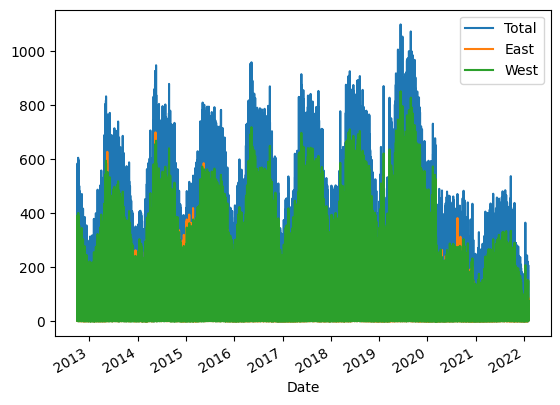

In [30]:
data.plot()

### 주 단위 합계 시각화

<Axes: xlabel='Date'>

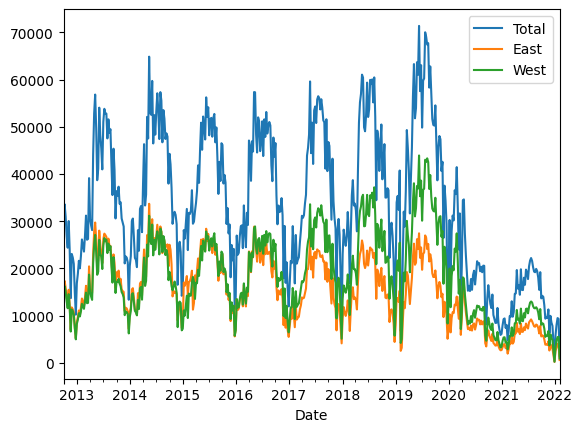

In [31]:
data.resample('W').sum().plot()

<Axes: xlabel='Date'>

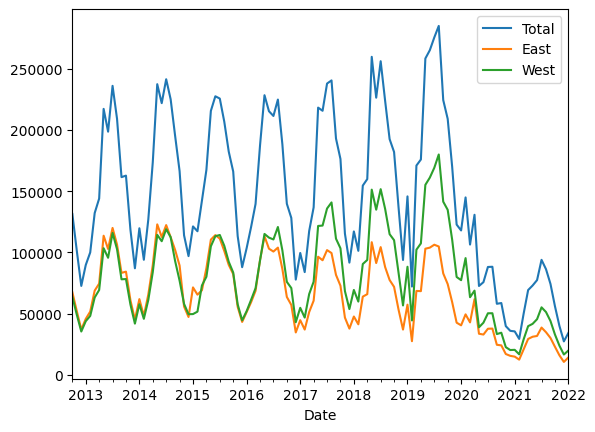

In [32]:
data.resample('M').sum().plot()

### 시간대별 평균

<Axes: xlabel='Date'>

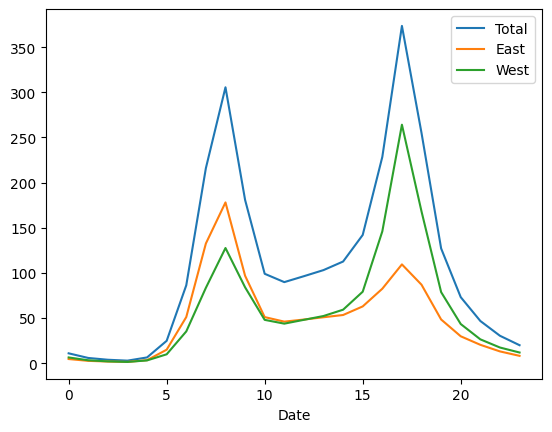

In [33]:
by_time = data.groupby(data.index.hour).mean()
by_time.plot()

### 요일별 평균

<Axes: xlabel='Date'>

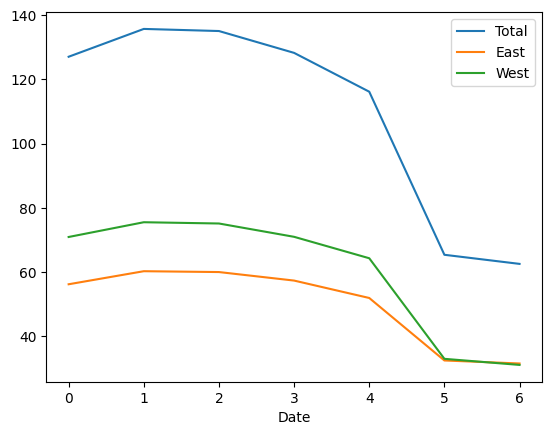

In [34]:
# 요일별 대여량(0: 월요일)
by_week = data.groupby(data.index.dayofweek).mean()
by_week.plot()

<Axes: xlabel='Date'>

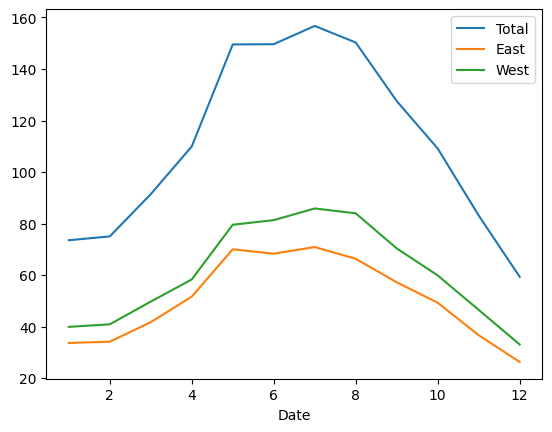

In [35]:
# 월별 대여량
by_month = data.groupby(data.index.month).mean()
by_month.plot()

### 주중과 주말의 비교

<Axes: xlabel='time'>

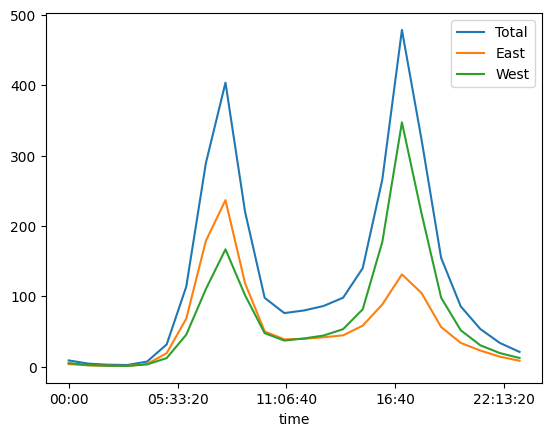

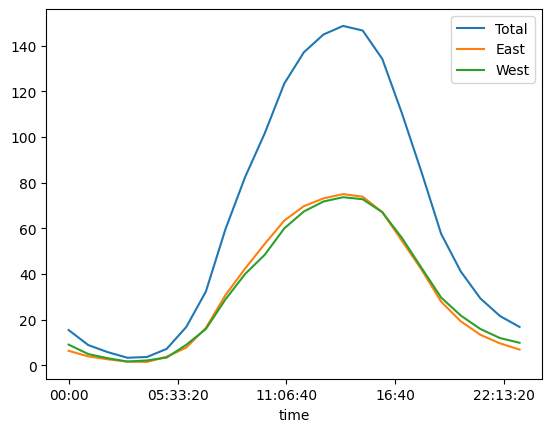

In [38]:
import numpy as np
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

by_time.loc['Weekday'].plot()
by_time.loc['Weekend'].plot()

In [39]:
by_time.loc['Weekday'] # Weekday 부분(location)만 보여줘

,Total,East,West
00:00:00,9.076469,3.859995,5.216474
01:00:00,4.505786,2.009076,2.496710
02:00:00,2.997050,1.465396,1.531654
03:00:00,2.580894,1.323576,1.257318
04:00:00,7.426367,4.022237,3.404902
05:00:00,31.766281,19.372589,12.393692
06:00:00,114.026776,68.398003,45.628772
07:00:00,289.448151,178.975494,110.472657
08:00:00,403.890855,236.915135,166.975720
09:00:00,220.241998,118.598184,101.643814


# 텍스트 분석과 자연어 처리
- 텍스트 분석 (text analytics)
    - 텍스트 데이터에서 언어학 통계학 머신 러닝의 기법을 이용
    - 의사결정 조사 연구 등을 위해 정보를 추출하고 분석
    - 텍스트 마이닝 text mining
    - 예) 고객 리뷰를 분석하여 제품을 개선하고 싶다
- 자연어 처리 (Natural Language Processing)
    - 언어학 컴퓨터 과학 인공지능 등의 한 분야
    - 컴퓨터를 이용해 자연어를 자동으로 처리하는 방법
    - 예) 고객 불만에 자동으로 응대하는 챗봇을 만들고 싶다

## 자연어(Natural Language)
- 자연어(natural language)
    - 한국어 영어 등 자연스럽게 생겨난 언어
- 인공어 constructed language
    - 에스페란토(1887): 자멘호프가 국제적 의사소통을 위해 개발
    - 나비: 영화 아바타의 외계인 언어로 사용하기 위해 개발
- 통제자연어(controlled natural language)
    - 자연어에서 어휘, 문법 및 의미 등을 단순하게 제한하여 만든 인공어
- 형식어(formal language): 수식 프로그래밍 언어 등



# 문서 단어 행렬
## Bag-of-Words 모형
- 어순, 문장 구조는 무시하고 단어의 출현 빈도만으로 파악
- 단순하지만 효과적

In [40]:
df = pd.read_excel('yelp.xlsx')
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [41]:
df.shape # 1000행(리뷰), 2열(review, sentiment)

(1000, 2)

### 문서 단어 행렬
- max_features: 문서단어행렬에 포함시킬 최대(max)의 단어(feature)수
- stop_words: 분석에서 제외할 불용어를 설정
    - english로 설정하면 영어의 경우 관사, 전치사 등을 제외(ex) a, the
    - 다른 언어는 리스트 등의 형태로 불용어 목록을 넘겨주어야

### 문서 단어 행렬 만들기

In [42]:
# 문서 단어 행렬 설정
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')

In [43]:
dtm = cv.fit_transform(df['review'])

In [44]:
dtm.shape

(1000, 500)

In [45]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

### 단어 빈도 데이터 프레임

In [46]:
word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})

In [47]:
# 식당 리뷰에 많이 나오는 단어 상위 20개
word_count.sort_values('빈도', ascending=False).head(20)

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70
231,like,46
442,time,42
343,really,36
220,just,35
41,best,30


In [48]:
# 엑셀 파일로 저장: 점 세 개 버튼을 누르면 다운로드 가능
word_count.to_excel('word_count.xlsx')

# 단어 구름(word cloud)
- 단어 빈도를 시각화하는 방법
- 자주 나오는 단어는 크게 드물게 나오는 단어는 작게 시각화
- 단어의 배치를 통해 특정한 이미지 형태가 되도록 하게도 함

In [49]:
!pip install wordcloud

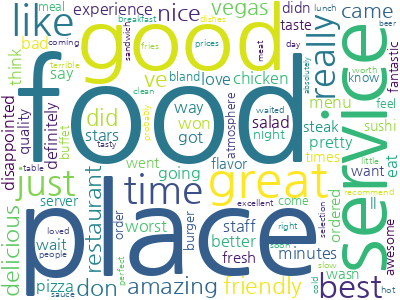

In [50]:
# NanumGothic.ttf 파일 먼저 다운받고

from wordcloud import WordCloud

wc = WordCloud(
    font_path='NanumGothic.ttf', # 원하는 글꼴은 눈누 등의 사이트에서 다운받아 쓰세요
    background_color='white',
    max_words=100,
    width=400,
    height=300
)

count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)
cloud.to_image()

## 특정 모양으로 그리기
1.그림판을 연다

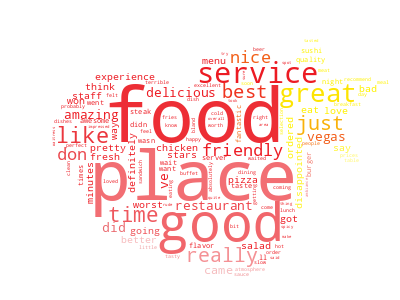

In [51]:
from PIL import Image
import numpy as np

# 그림을 불러온다
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()

# 토큰화
- 문장을 토큰(분석의 단위)으로 쪼개는 것
- 영어의 경우 흔히 단어 단위로 토큰화
- 한국어의 경우 흔히 형태소 단위로 토큰화


### Python에서 한국어 토큰화 방법
Kiwi 사용법

In [52]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=5a8cf211bf2f266d8cf9547ec6c61e8692839588150538e763e702b75c7cf684
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [53]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [54]:
kiwi.tokenize('오늘은 자연어 처리를 배우기 좋은 날이다.')

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='자연어', tag='NNP', start=4, len=3),
 Token(form='처리', tag='NNG', start=8, len=2),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='배우', tag='VV', start=12, len=2),
 Token(form='기', tag='ETN', start=14, len=1),
 Token(form='좋', tag='VA', start=16, len=1),
 Token(form='은', tag='ETM', start=17, len=1),
 Token(form='날', tag='NNG', start=19, len=1),
 Token(form='이', tag='VCP', start=20, len=1),
 Token(form='다', tag='EF', start=21, len=1),
 Token(form='.', tag='SF', start=22, len=1)]

In [55]:
def extract_nouns(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']: # NNG: 일반명사, NNP: 고유 명사 만 뽑겠다
            yield token.form

In [56]:
list(extract_nouns('어제는 홍차를 마시고, 오늘은 커피를 마셨다.'))

['어제', '홍차', '오늘', '커피']

### 한국어 문서 단어 행렬 만들기

In [57]:
df = pd.read_csv('news_ai.csv')

kiwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG')

cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)
dtm = cv.fit_transform(df['본문'])
word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})
word_count.sort_values('빈도', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,단어,빈도
18,기술,279
70,인공지능,247
12,교육,146
2,개발,144
80,제공,116
76,전형,109
45,서비스,107
22,대표,106
84,지원,103
41,산업,101


### 워드 클라우드로 그려보기

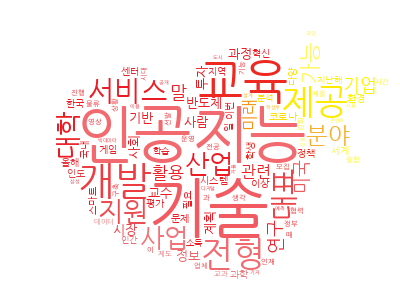

In [58]:
count_dic = dict(zip(word_count.단어, word_count.빈도))
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', font_path='NanumGothic.ttf', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()